In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [2]:
digits=load_digits()

In [5]:
#to explore what this traing set contains
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
#matrix rep of image
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

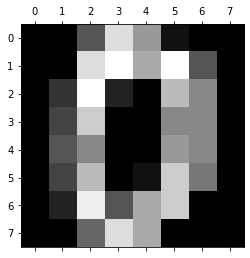

In [9]:
#to print the image
plt.gray()
plt.matshow(digits.images[0])

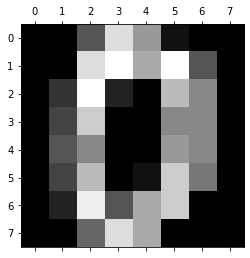

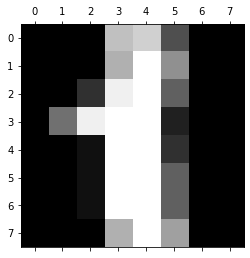

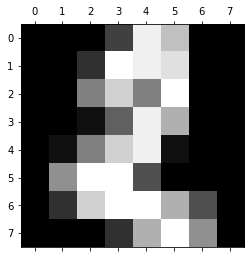

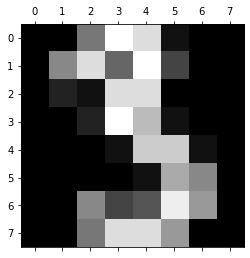

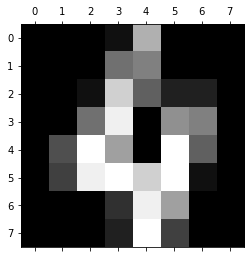

In [12]:
#to print first 5 samples
for i in range(5):
    plt.matshow(digits.images[i])

In [14]:
#the images actual value is stored in target
#to print first 5 samples value
for i in range(5):
    print(digits.target[i])

0
1
2
3
4


In [15]:
#so use data and target to train the model

In [16]:
# to split test and traing data using sklearn model
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [18]:
len(X_train)

1437

In [19]:
len(X_test)

360

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [22]:
#to train
model.fit(X_train,Y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
model.score(X_test,Y_test)

0.9638888888888889

In [26]:
model.predict([digits.data[67]])

array([6])

6

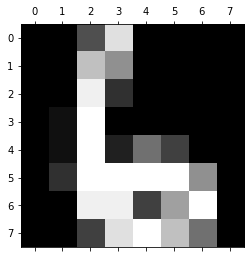

In [27]:
#checking if the prediction is right
plt.matshow(digits.images[67])
digits.target[67]

In [29]:
#to predict first 5 samples
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

# To check where the model is predicting is incorect- Confusion Matrix

In [32]:
Y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [33]:
cm=confusion_matrix(Y_test,Y_predicted)
cm

array([[32,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  2, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 35,  0,  1,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 36]], dtype=int64)

Text(69.0, 0.5, 'truth')

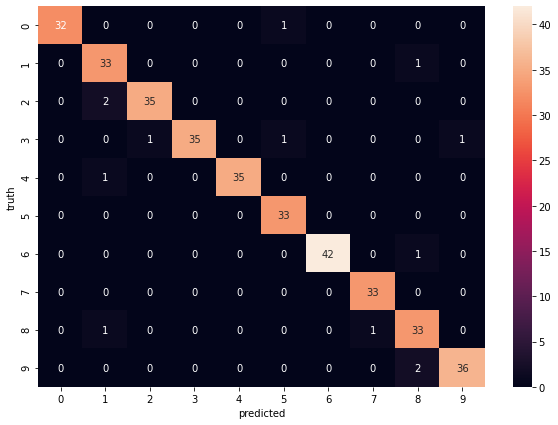

In [37]:
#to visualise using seaborn/(matplotlib)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')